<a href="https://colab.research.google.com/github/SeongilHeo/hufs_ai_camp/blob/master/Day3_2_dnn_spiral_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 싸인 함수 회귀분석 (Sine Regression)

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.3.0


## 데이터 생성

#### Spiral Data Generation 함수 정의

In [ ]:
theta = 4

# generate the data
def generate_spiral_dataset(num_data, num_class, num_dim=2):
    input_data = np.zeros((num_data*num_class,num_dim)) # data matrix (each row = single example)
    output_data = np.zeros(num_data*num_class, dtype='uint8') # class labels

    for j in range(num_class):
      ix = range(num_data*j,num_data*(j+1))
      r = np.linspace(0.0,1,num_data) # radius [0,1]
      t = np.linspace(j*theta,(j+1)*theta,num_data) + np.random.randn(num_data)*0.2 # theta [0, 4]
      input_data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      output_data[ix] = j
    
    return input_data, output_data

#### 훈련 데이터, 테스트 데이터 생성

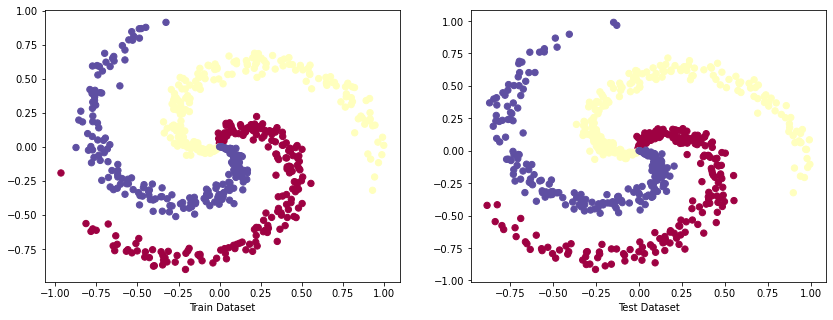

In [ ]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

train_x, train_y = generate_spiral_dataset(N, K, D)
test_x, test_y = generate_spiral_dataset(N, K, D)

# lets visualize the data:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Train Dataset")
plt.subplot(1,2,2)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Test Dataset")
plt.show()

## 모델 정의

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=[D]),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(K, activation='softmax')
])

## 모델 훈련

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9950
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9967
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9967
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9950
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9967
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9950
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9950
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9967
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9967
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9967
Epoch 11/

KeyboardInterrupt: ignored

## 테스트

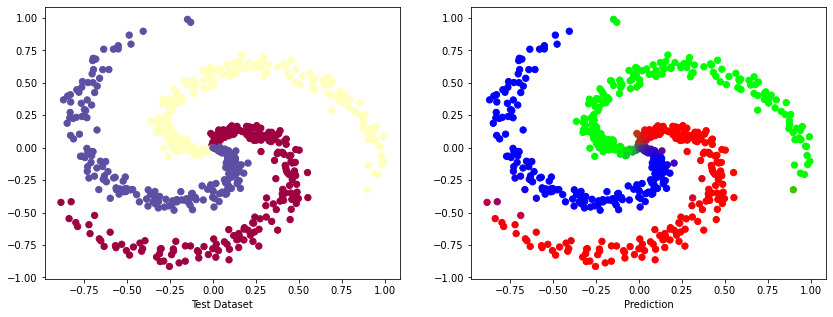

In [ ]:
test_output_pred = model.predict(test_x)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Test Dataset")
plt.subplot(1,2,2)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_output_pred, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Prediction")
plt.show()